In [ ]:
from keras.datasets import mnist, fashion_mnist
from keras.layers import Dense, Flatten, GaussianNoise, Input, Reshape, Lambda, Conv2D, Dropout, UpSampling2D, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
train, test = fashion_mnist.load_data()
X_train, y_train = train[0], train[1]
X_test, y_test = test[0], test[1]
X_train = X_train/255
X_test = X_test/255

4422102/4422102 [==============================] - 0s 0us/step


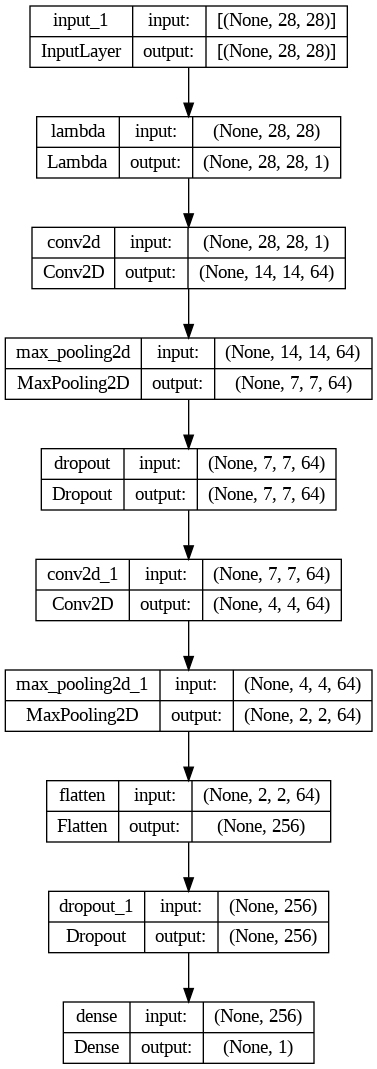

In [ ]:
# listing 10.1
act_f = 'relu'
descriptor_layers = [
    Lambda(lambda x: K.expand_dims(x, axis=-1)),
    Conv2D(64,(5,5),strides=(2,2),padding='same'),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(64,(5,5),strides=(2,2),padding='same'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(1, 'sigmoid')]
descriptor_input = descriptor_output = Input(X_train.shape[1:])
for layer in descriptor_layers:
  descriptor_output = layer(descriptor_output)
descriptor = Model(inputs = descriptor_input,outputs = descriptor_output)
descriptor.compile(loss='BinaryCrossentropy',metrics='accuracy',optimizer=Adam(0.001, beta_1=0.8))

plot_model(descriptor, show_shapes=True)

In [ ]:
X_train_real = X_train.copy()
X_train_fake = tf.random.normal([60000, 28, 28])
y_train_real = np.repeat(1,X_train_real.shape[0])
y_train_fake = np.repeat(0,X_train_fake.shape[0])
X_train_desc = np.concatenate([X_train_real,X_train_fake])
y_train_desc = np.concatenate([y_train_real,y_train_fake])
descriptor.fit(X_train_desc,y_train_desc,epochs = 5)



Epoch 1/5
3750/3750 [==============================] - 19s 3ms/step - loss: 6.8865e-04 - accuracy: 0.9997
Epoch 2/5
3750/3750 [==============================] - 11s 3ms/step - loss: 2.7485e-07 - accuracy: 1.0000
Epoch 3/5
3750/3750 [==============================] - 11s 3ms/step - loss: 2.9464e-08 - accuracy: 1.0000
Epoch 4/5
3750/3750 [==============================] - 12s 3ms/step - loss: 4.5995e-09 - accuracy: 1.0000
Epoch 5/5
3750/3750 [==============================] - 11s 3ms/step - loss: 8.8159e-10 - accuracy: 1.0000


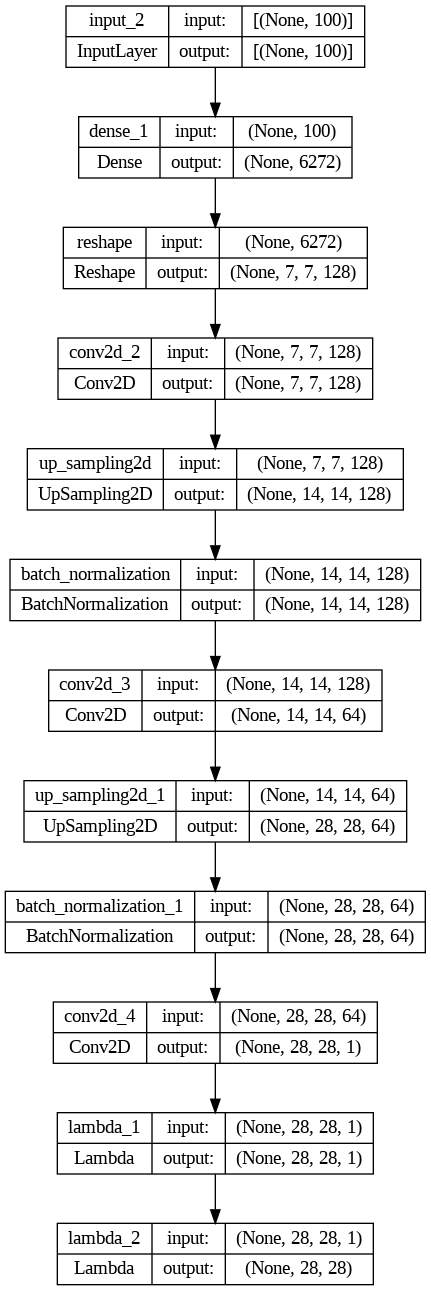

In [ ]:
# listing 10.2
act_f = 'selu'
hidden_dim = 100
channel_cnt = 128
generator_layers = [
  Dense(channel_cnt*7*7, activation=act_f),
  Reshape((7, 7, channel_cnt)),
  Conv2D(128,(5,5),padding='same',activation=act_f),
  UpSampling2D((2,2)),
  BatchNormalization(),
  Conv2D(64,(5,5),padding='same',activation=act_f),
  UpSampling2D((2,2)),
  BatchNormalization(),
  Conv2D(1, kernel_size=(7,7),padding='same', activation='sigmoid'),
  Lambda(lambda x: x*255),
  Lambda(lambda x: K.squeeze(x, axis=-1))]
generator_input = generator_output = Input((hidden_dim,))
for layer in generator_layers:
  generator_output = layer(generator_output)
generator = Model(inputs = generator_input,outputs = generator_output)

plot_model(generator, show_shapes=True)

In [ ]:
gan = Model(inputs = generator.input,outputs = descriptor(generator.outputs))
descriptor.trainable = False
gan.compile(loss='BinaryCrossentropy',optimizer=Adam(0.0002, beta_1=0.8))

epoch 1 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 160ms/step
epoch 2 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step
epoch 3 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step
epoch 4 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 5 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 6 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step
epoch 7 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 8 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 9 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 10 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 13ms/step
epoch 11 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step
epoch 12 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 13 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step
epoch 14 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step
epoch 15 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step
epoch 16 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 17 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step
epoch 18 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 19 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 20 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 21 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 22 of 40


<ipython-input-6-fd7e573aeafa>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, arr_cnt,figsize=(5*arr_cnt, arr_cnt))


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step
epoch 23 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step
epoch 24 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 13ms/step
epoch 25 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step
epoch 26 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 27 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 28 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step
epoch 29 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 13ms/step
epoch 30 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 31 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 13ms/step
epoch 32 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 33 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 34 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step
epoch 35 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step
epoch 36 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 37 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step
epoch 38 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
epoch 39 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step
epoch 40 of 40


  0%|          | 0/256 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


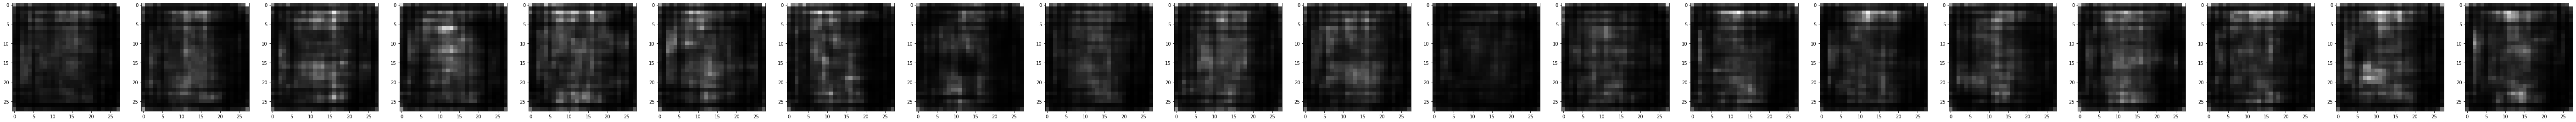

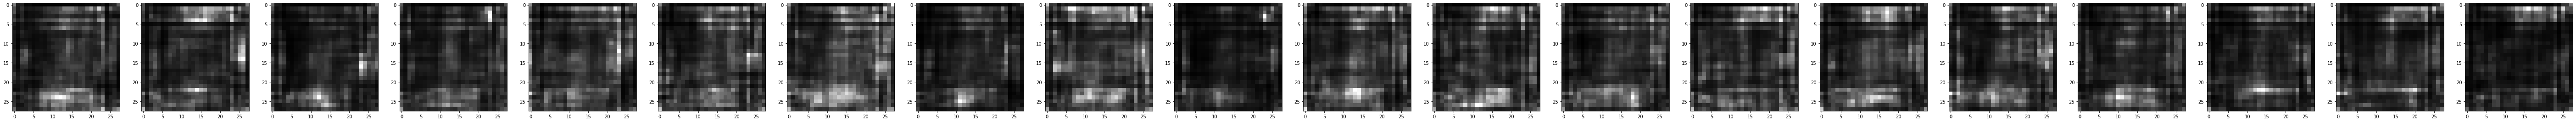

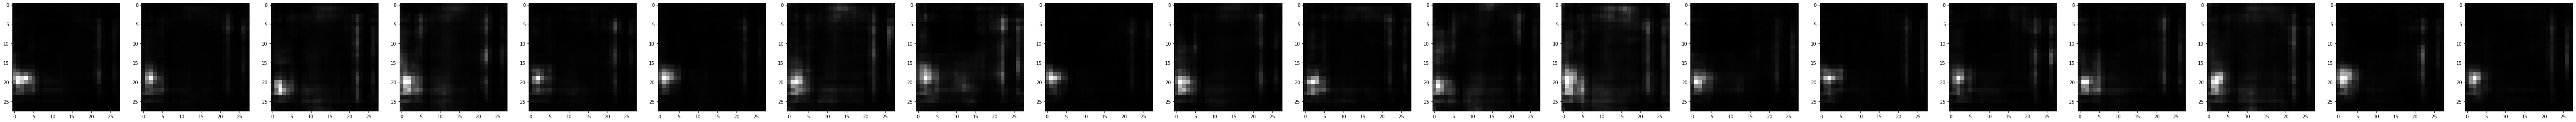

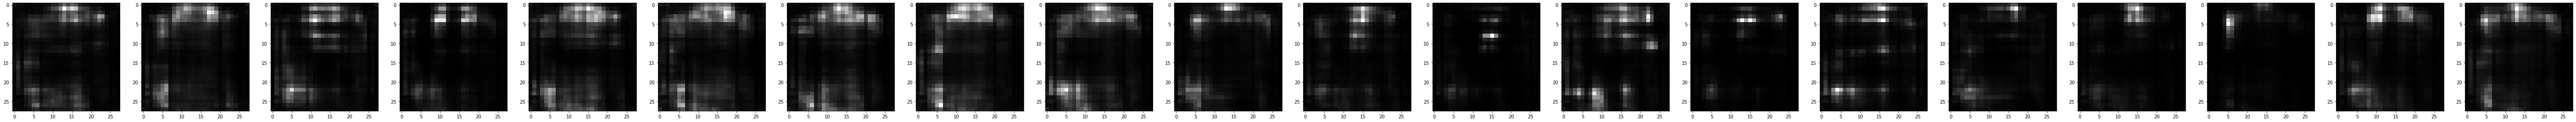

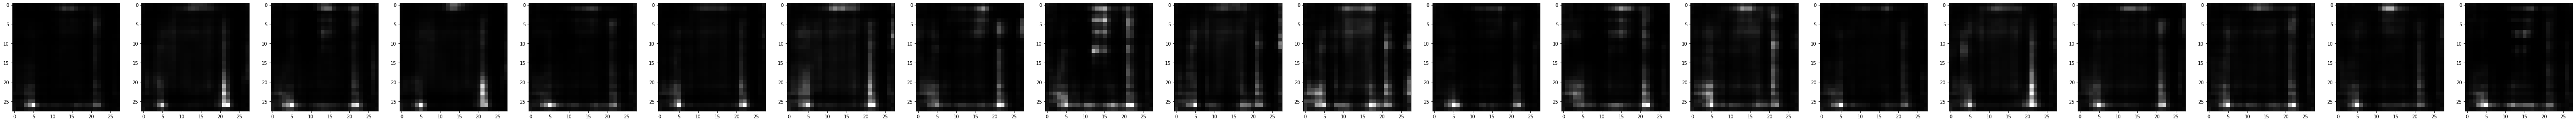

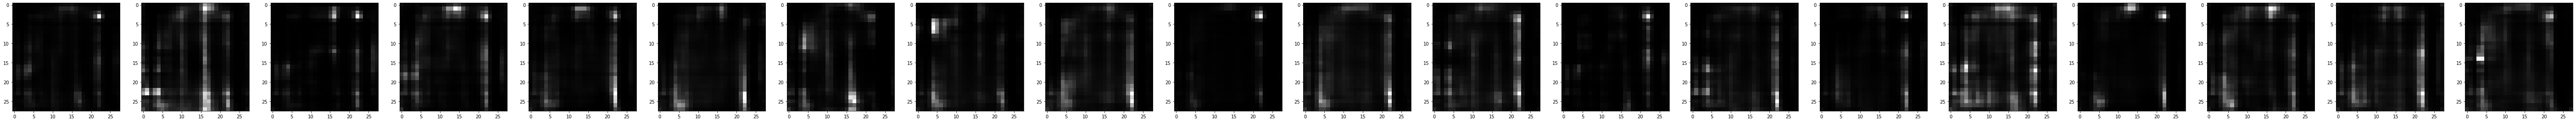

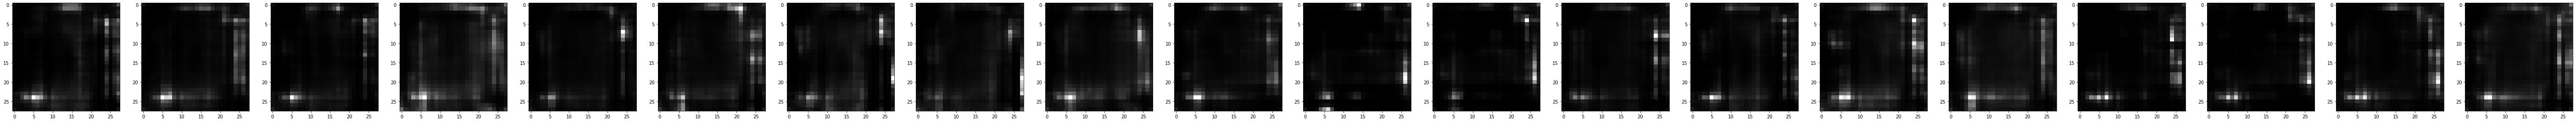

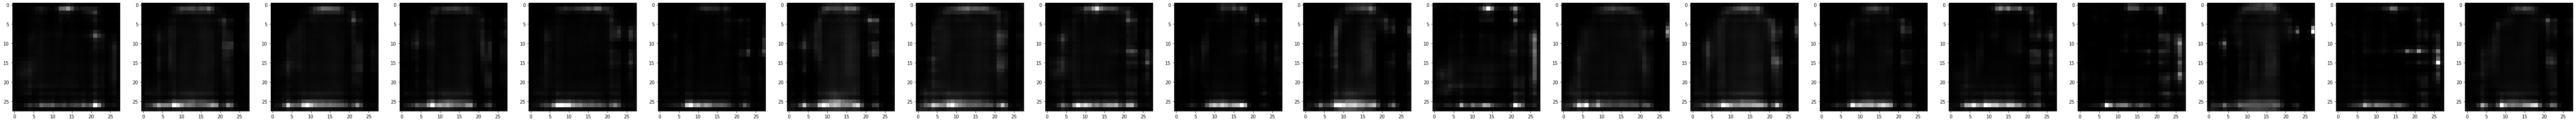

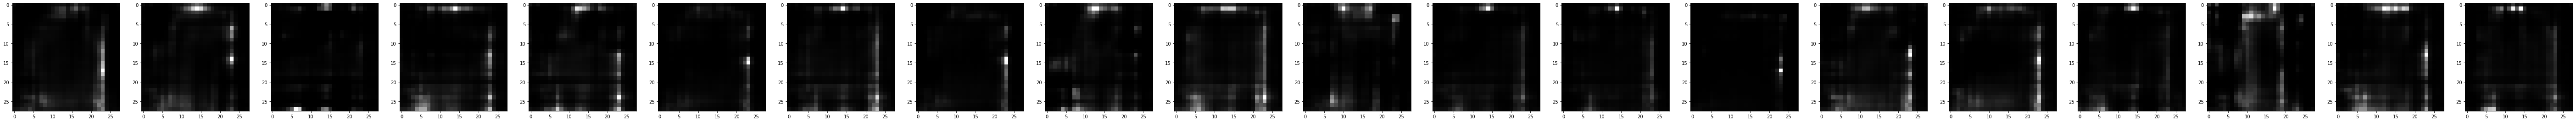

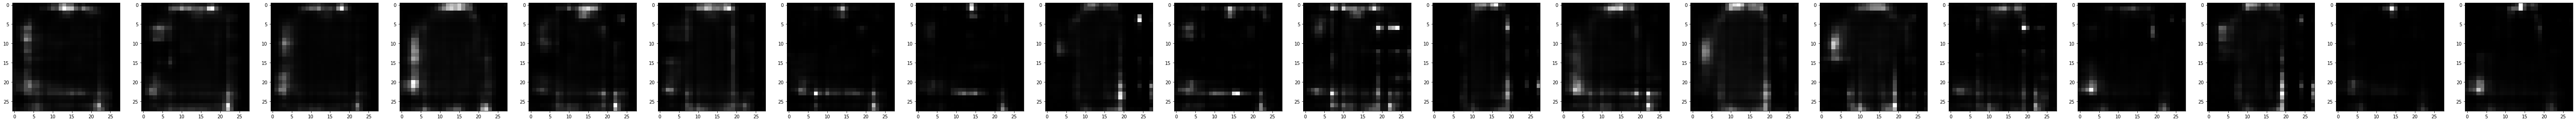

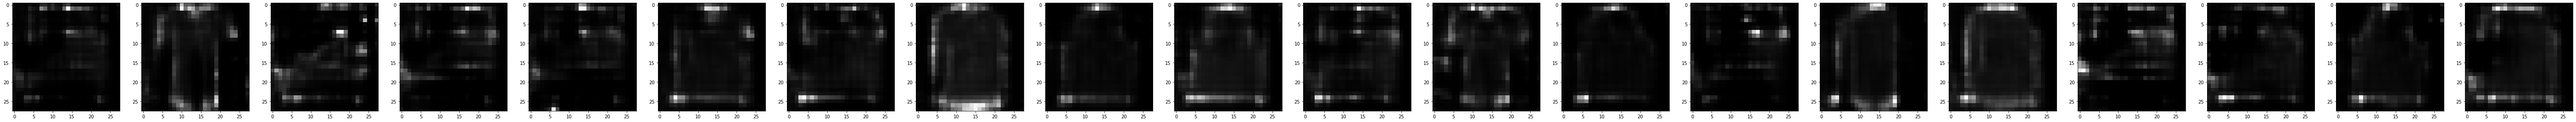

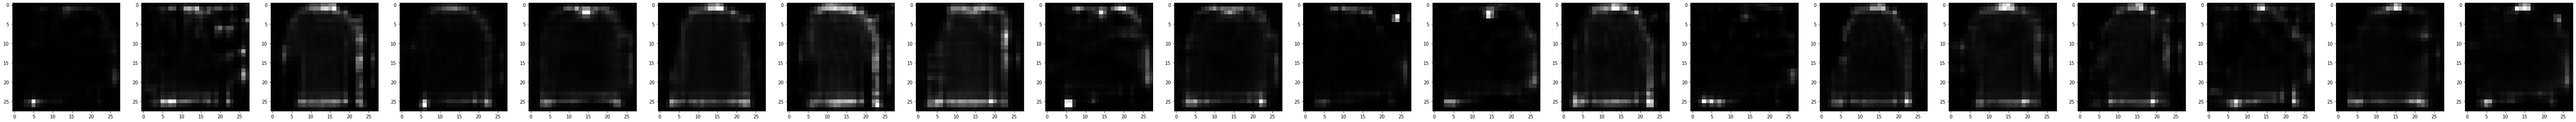

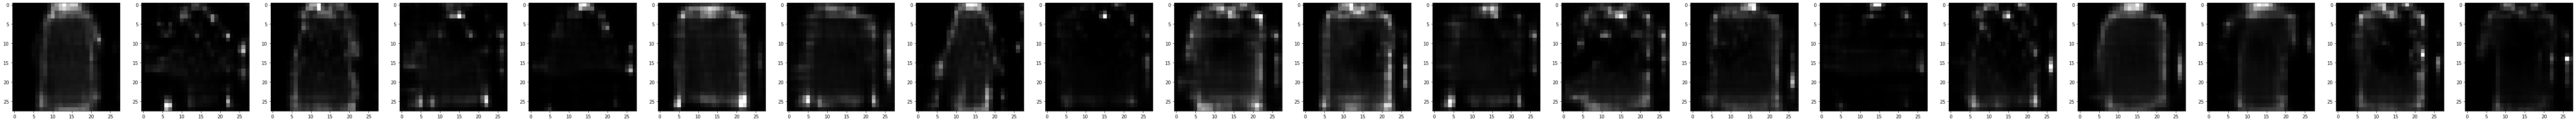

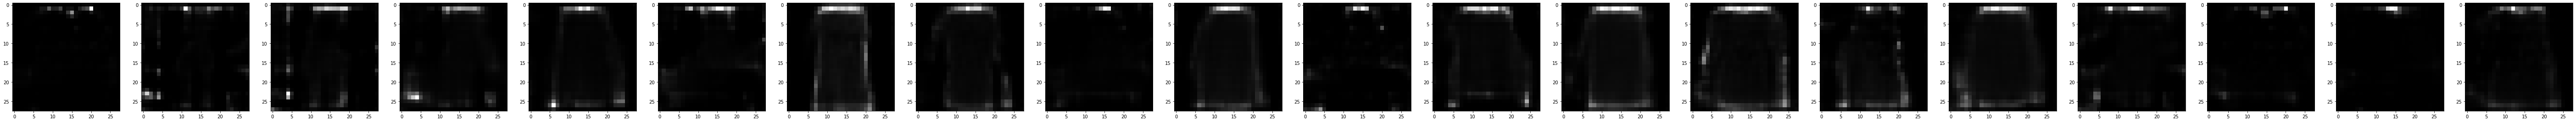

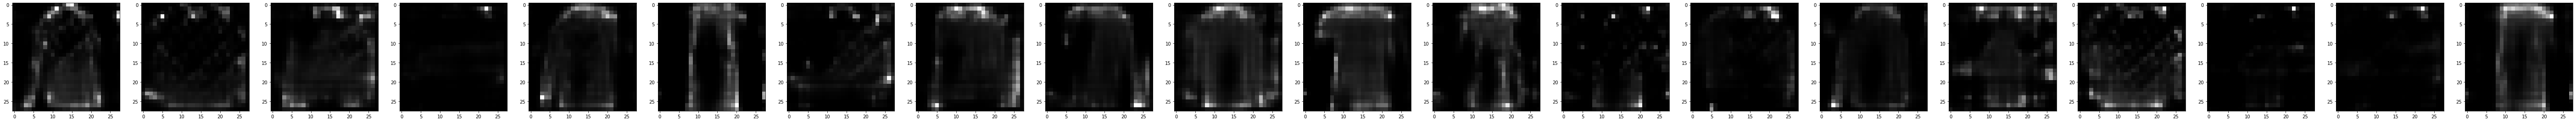

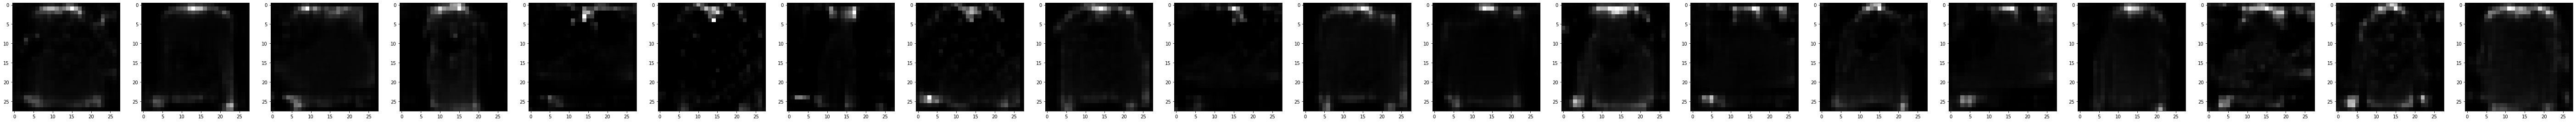

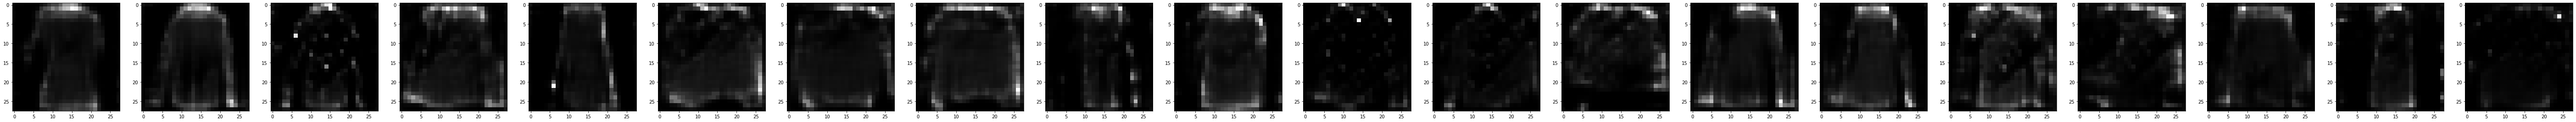

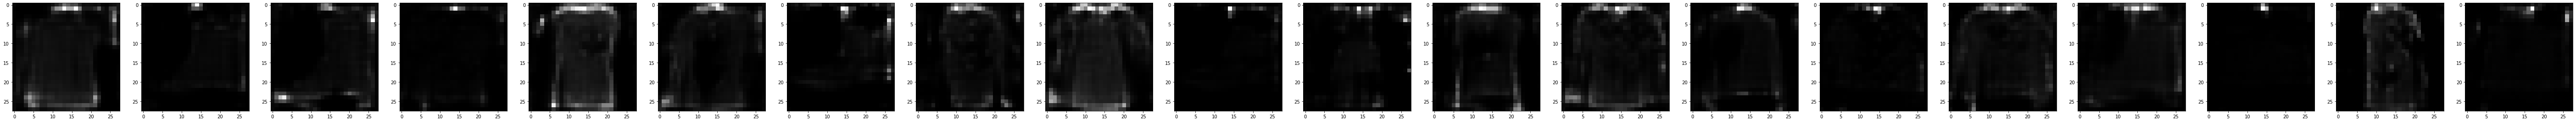

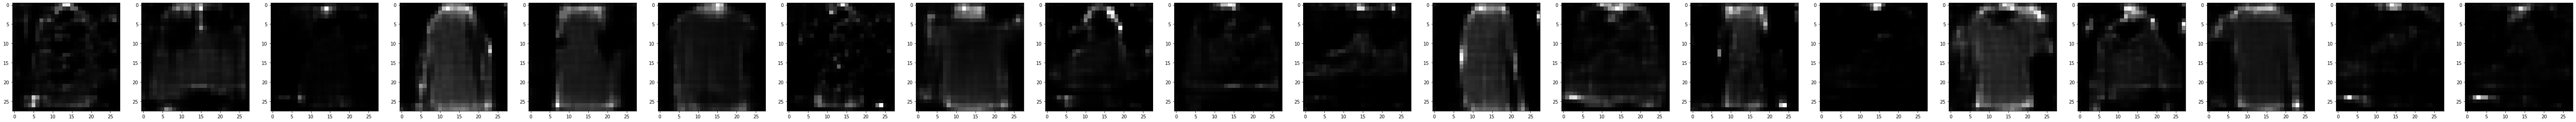

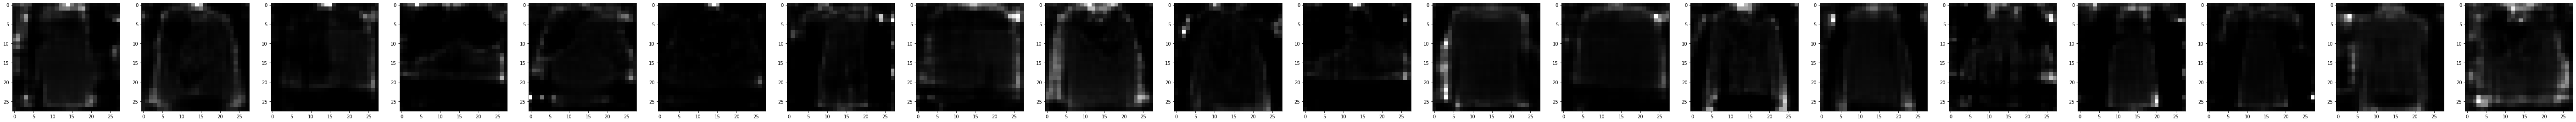

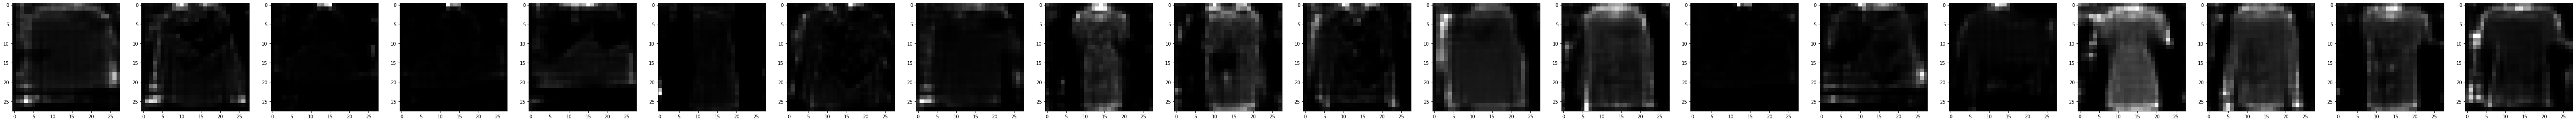

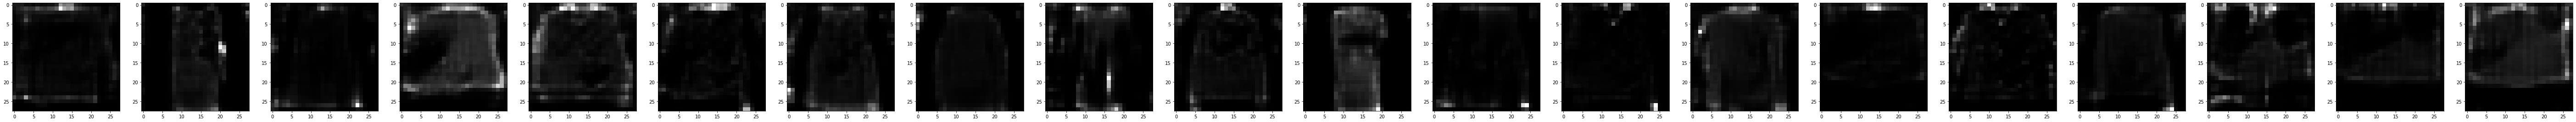

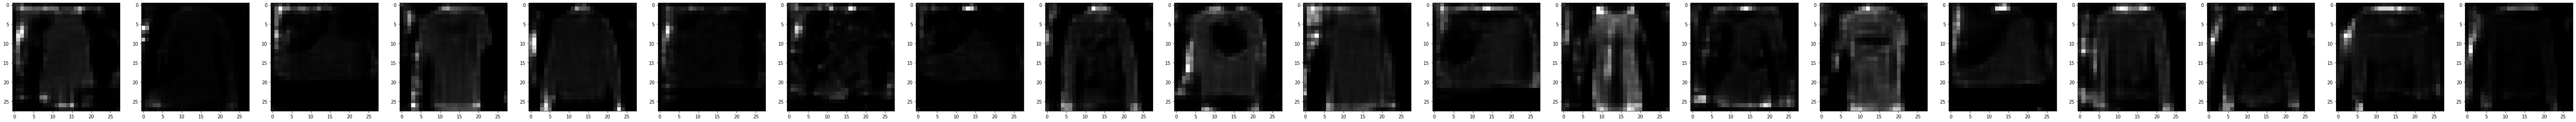

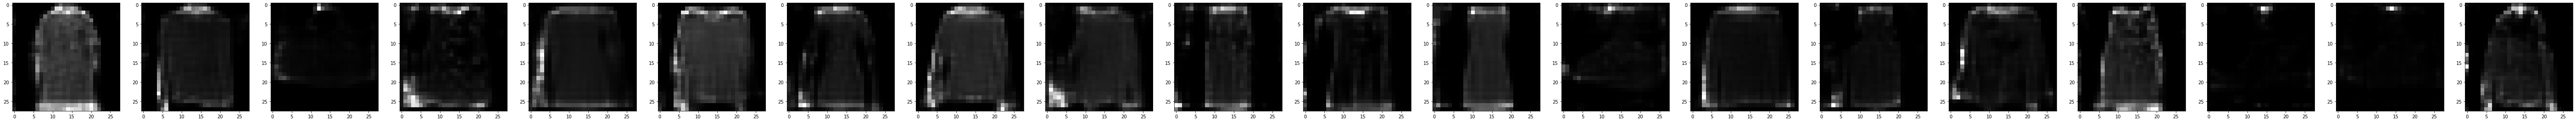

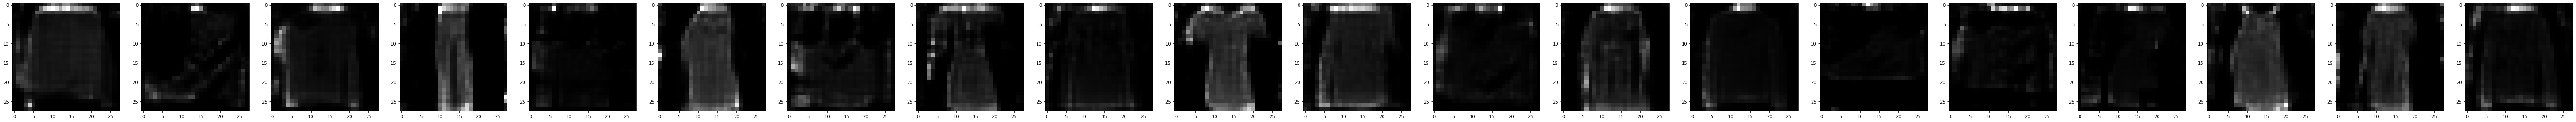

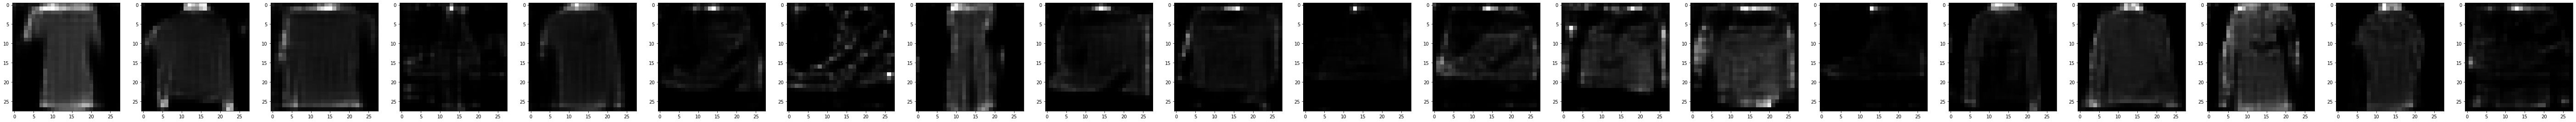

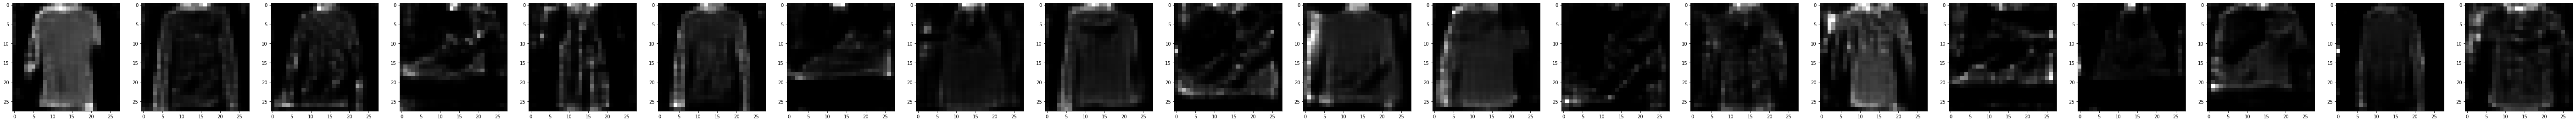

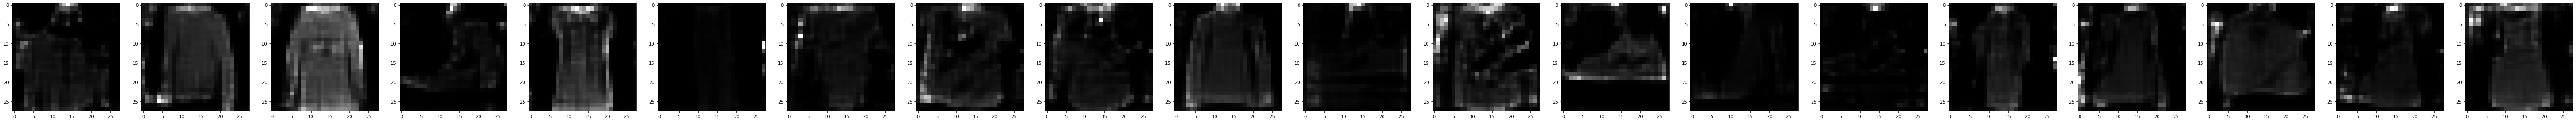

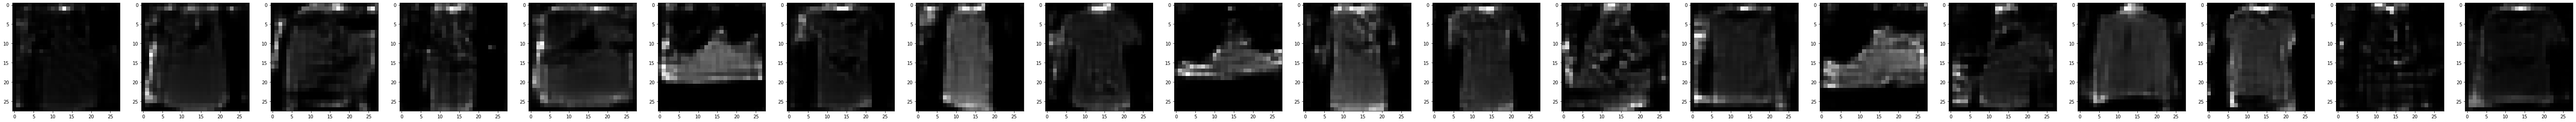

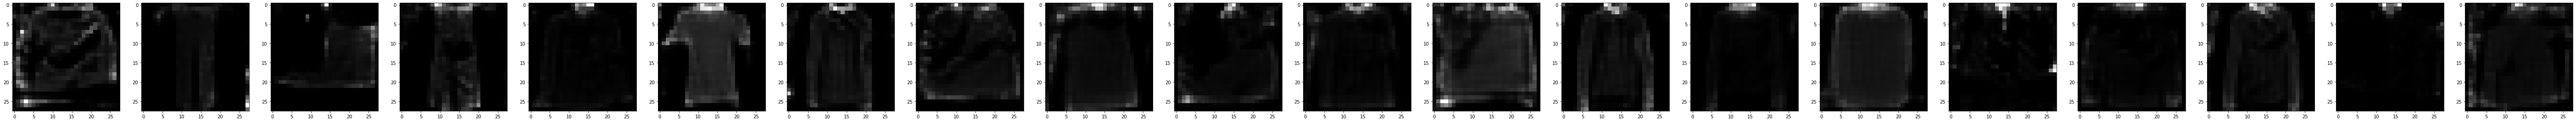

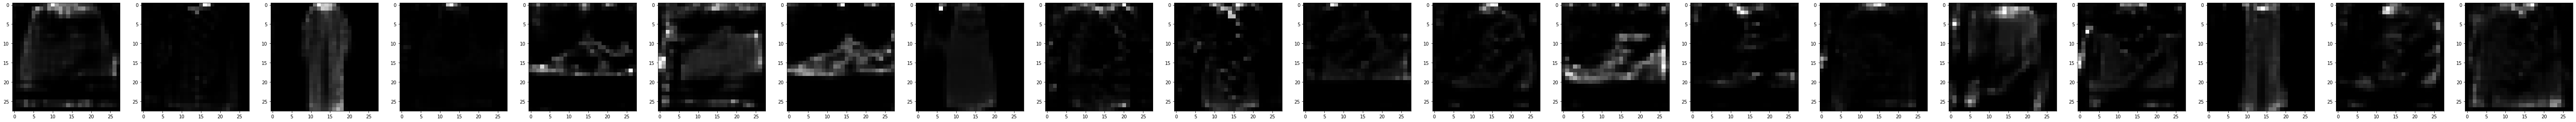

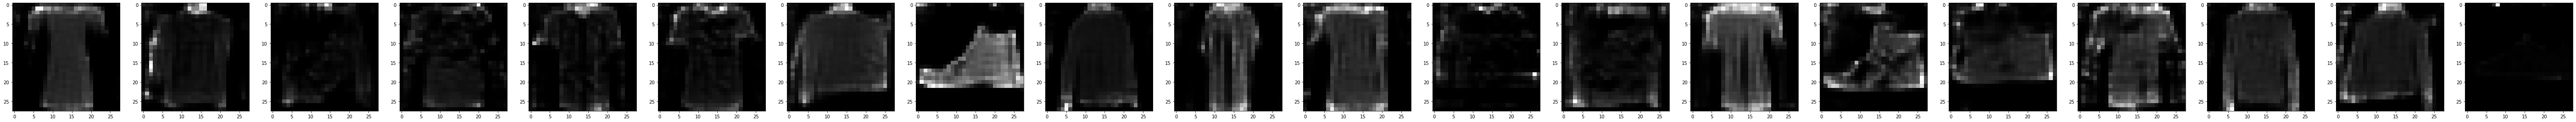

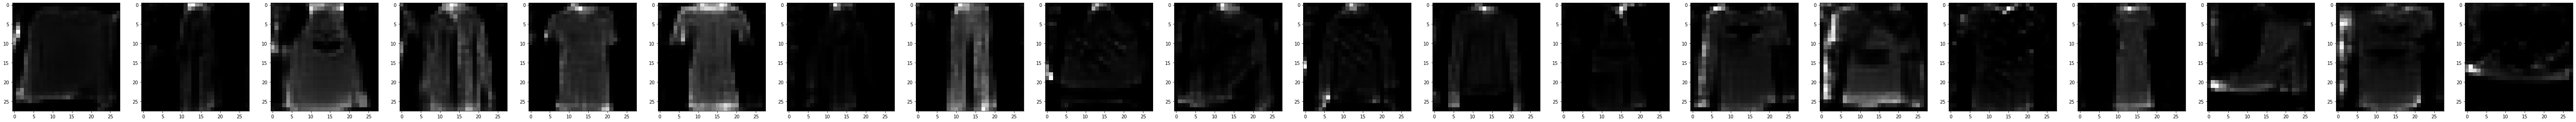

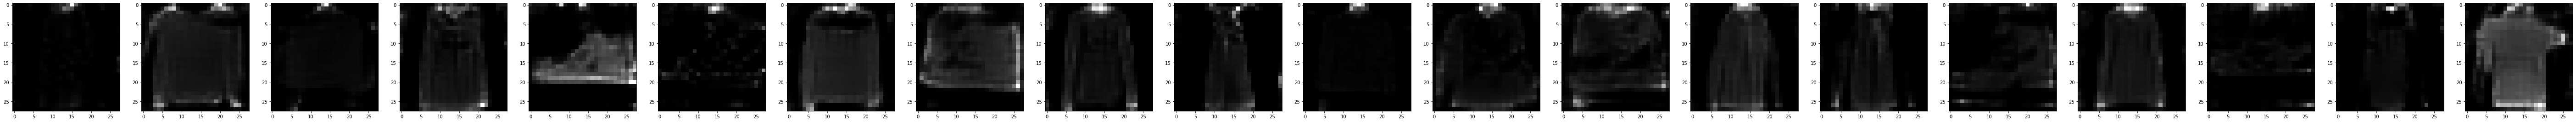

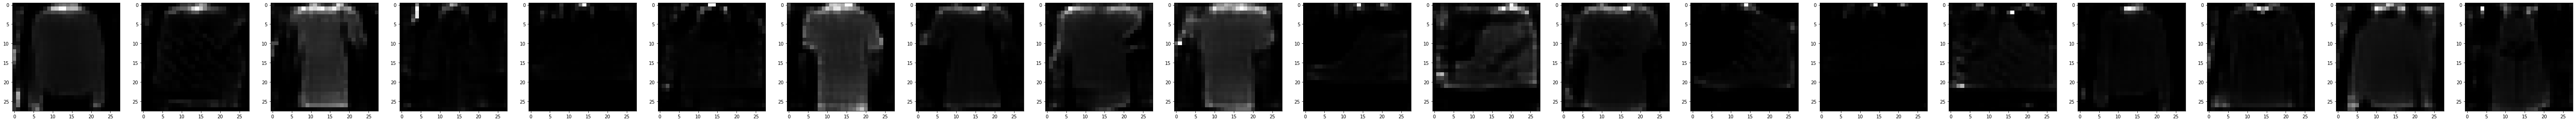

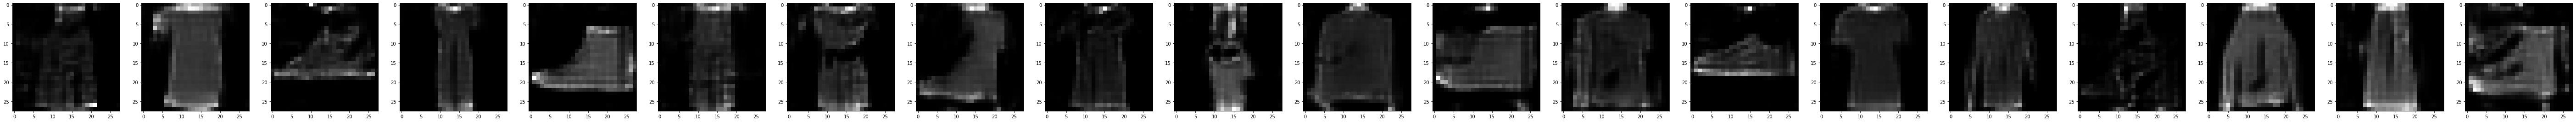

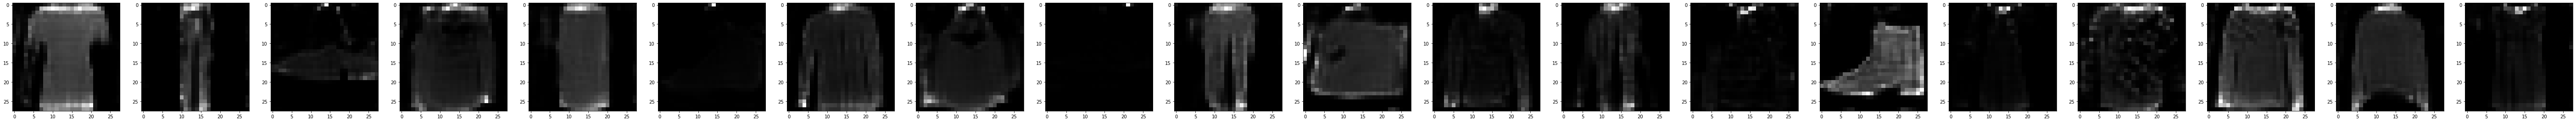

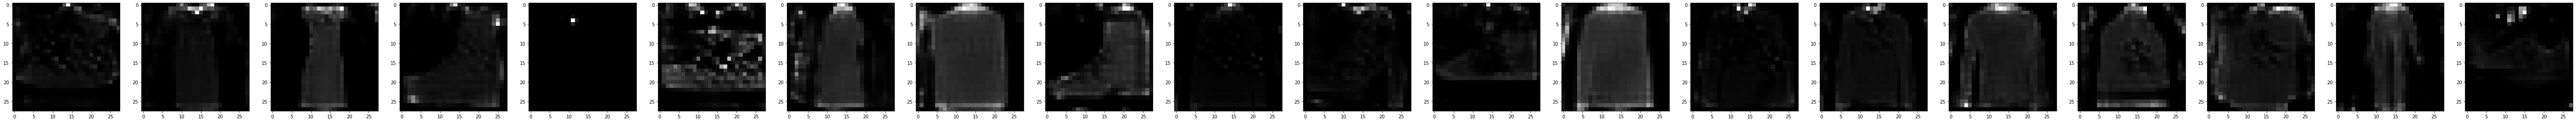

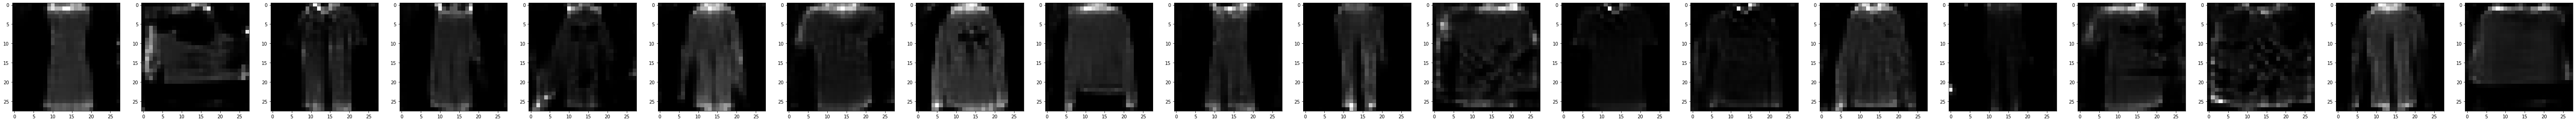

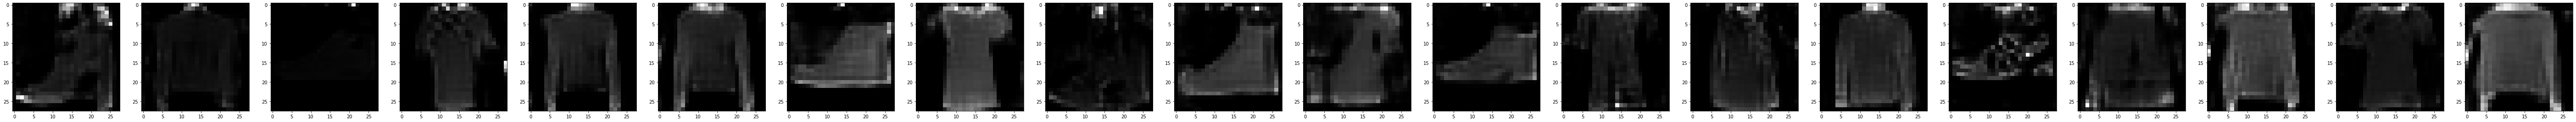

In [ ]:
def show_pictures(arrs):
  arr_cnt = arrs.shape[0]
  fig, axes = plt.subplots(1, arr_cnt,figsize=(5*arr_cnt, arr_cnt))
  for axis, pic in zip(axes, arrs):
    axis.imshow(pic.squeeze(), cmap = 'gray')

def make_train_batch(X_train,batch_size,batch_num,hidden_dim,generator):
  noise=tf.random.normal([batch_size,hidden_dim])
  X_train_real = X_train[batch_num*batch_size:(batch_num+1)*batch_size,:].copy()
  X_train_fake = generator(noise,training=True)
  y_train_real = np.repeat(1,X_train_real.shape[0])
  y_train_fake = np.repeat(0,X_train_fake.shape[0])
  X_all = np.concatenate([X_train_real,X_train_fake])
  y_all = np.concatenate([y_train_real,y_train_fake])
  return (X_all, y_all)

def generate_images(img_cnt, hidden_dim, generator):
  noise = tf.random.normal([img_cnt,hidden_dim])
  result = generator.predict(noise)
  return result

from tqdm.notebook import tqdm
epoch_cnt = 40
img_cnt = X_train.shape[0]
batch_cnt = 256
batch_size = 256
for i in range(epoch_cnt):
  print(f'epoch {i+1} of {epoch_cnt}')
  for batch in tqdm(range(batch_cnt)):
    X_all, y_all = make_train_batch(X_train,batch_size,batch, hidden_dim, generator)
    descriptor.train_on_batch(X_all, y_all)
    X_gan = np.random.randn(batch_size*2,hidden_dim)
    y_gan = np.ones((batch_size*2,))
    gan.train_on_batch(X_gan, y_gan)
  generated_images = generate_images(20, hidden_dim,generator)
  show_pictures(generated_images)
